In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("test_sample.csv", lineterminator="\n")
data["created_time"] = pd.to_datetime(data["created_time"])

1. This code generates a histogram showing how posts are distributed across different hours of the day. The x-axis represents the hours (0–23), while the y-axis indicates the number of posts. The plot helps identify the times of the day with the highest user activity.

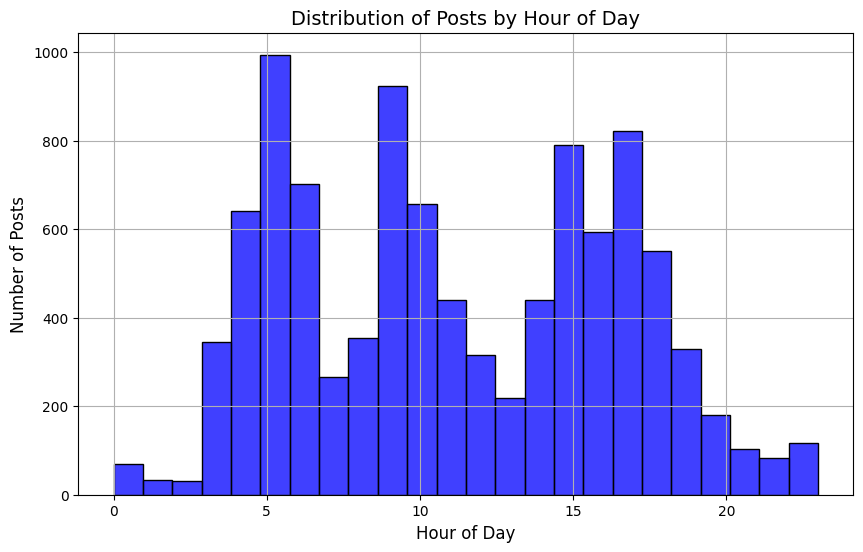

In [21]:
data['hour'] = data['created_time'].dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data['hour'], bins=24, kde=False, color='blue')
plt.title('Distribution of Posts by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.grid()
plt.show()

2. This code groups posts by text length (in characters) and creates a bar chart. The text length is divided into ranges (e.g., 0–50, 51–100, etc.). The chart shows how often posts of a certain length occur, helping to understand user preferences for post length.

C:\Users\pavik\AppData\Local\Temp\ipykernel_18392\2162778171.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['text_length'] = data[['text_original', 'text_additional']].fillna('').apply(lambda x: len(x[0] + x[1]), axis=1)


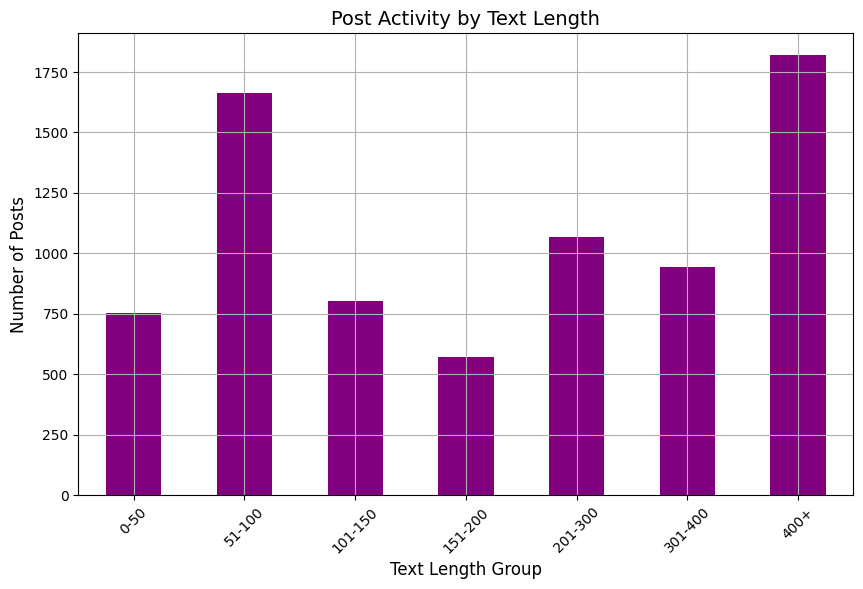

In [22]:
data['text_length'] = data[['text_original', 'text_additional']].fillna('').apply(lambda x: len(x[0] + x[1]), axis=1)
bins = [0, 50, 100, 150, 200, 300, 400, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-300', '301-400', '400+']
data['text_length_group'] = pd.cut(data['text_length'], bins=bins, labels=labels)
text_length_counts = data['text_length_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
text_length_counts.plot(kind='bar', color='purple')
plt.title('Post Activity by Text Length', fontsize=14)
plt.xlabel('Text Length Group', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

3.This snippet calculates the average engagement metrics (likes, shares, comments, views) for each platform (e.g., Instagram, TikTok). The bar chart enables a comparison of how different platforms affect user engagement.

<Figure size 1200x600 with 0 Axes>

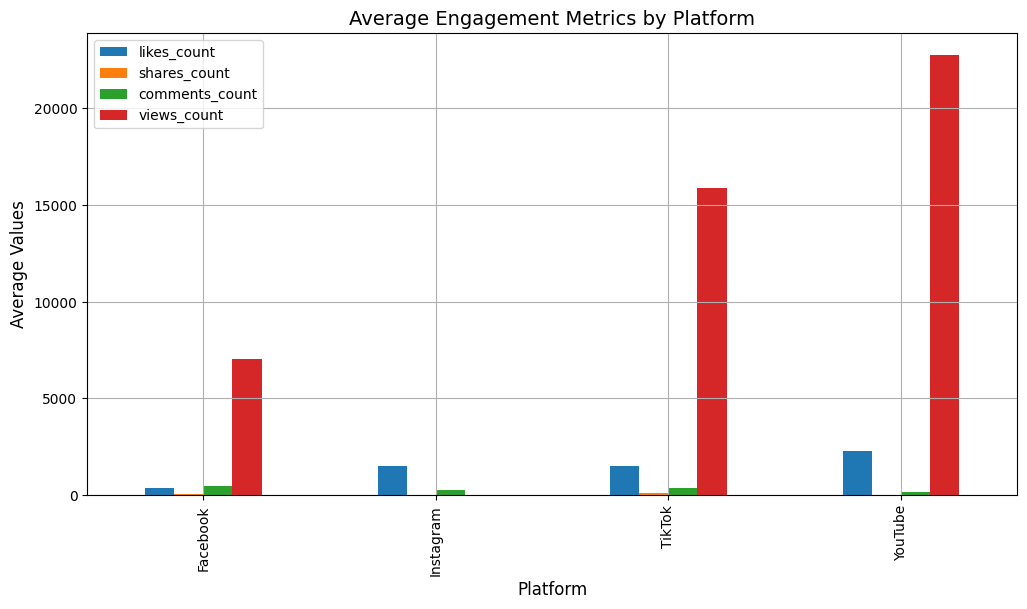

In [23]:
engagement_metrics = ['likes_count', 'shares_count', 'comments_count', 'views_count']
platform_engagement = data.groupby('platform')[engagement_metrics].mean()

plt.figure(figsize=(12, 6))
platform_engagement.plot(kind='bar', figsize=(12, 6))
plt.title('Average Engagement Metrics by Platform', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.grid()
plt.show()

4.This code identifies accounts with "anomalous" engagement metrics (values exceeding 50% above the platform average). It helps to detect accounts with unusually high popularity or those that might use automated methods to increase engagement.

In [24]:
thresholds = data.groupby('platform')[engagement_metrics].mean() * 1.5
anomalies = []
for platform in data['platform'].unique():
    platform_data = data[data['platform'] == platform]
    for metric in engagement_metrics:
        anomalies.extend(platform_data[platform_data[metric] > thresholds.loc[platform, metric]]['account_id'].unique())

print("Accounts with Anomalous Values (50%+ above average for platform):")
print(set(anomalies))

Accounts with Anomalous Values (50%+ above average for platform):
{'100069656328050', 'UCEaVXzCYOxl77NFD8U97q5A', 'UCfw-AVPsJICUTYAXudpZjsA', 'UCZDp5opaZqL3_jed23UU--g', 'UCzZX_eiTTwqBk7EugaT9z4Q', '60554087008', '7306055620665820166', '61880924253', 'UC3pF1tXsYI8Xme1oxciBXfw', '61550094695943', 'UCMIRLx5TlcB3JgNOgQBtLAQ', '7306849648332243969', '62605500679', 'UCnCTdYt9SicG9-yrlf-0GbQ', 'UCnPA1FJ1BsJxwBXWm9JZvLw', '100093017576195', '100083858914680', '100071709930477', '7304639704442504193', 'UCaJeT6faItNN4lc4vHRjDHw', 'UCt2S7LXpxcw791Ny_Q9PQIw', '61867718379', '100095032152827', '7305775548541256737', 'UCl50A5-fUAPnUO6_u0JbtbQ', '100090791239265', '7327430517305066529', '7317060523728045062', '7305768185533236256', '100093218877205', 'UCTwAdxUN1yvXONKEGH3Flwg', '100090201525315', '61344079846', '100092179970608', '100092726436702', '100080104697411', 'UCM64DwKZ7Qg7T0pBqzRaVug', '7325852473468879905', 'UCxLQy3y8r2sZbzVrRYIMEIQ', 'UC8yF2m7yYeAdKykJ_geZYFg', 'UC5rvLcDAFOWn7y9ybOR4f5Q',

5.This code counts the number of hashtags in each post and calculates the average engagement metrics for different hashtag counts. The line chart shows how the number of hashtags influences likes, comments, shares, and views, providing insights into whether hashtags improve a post's popularity.

<Figure size 1000x600 with 0 Axes>

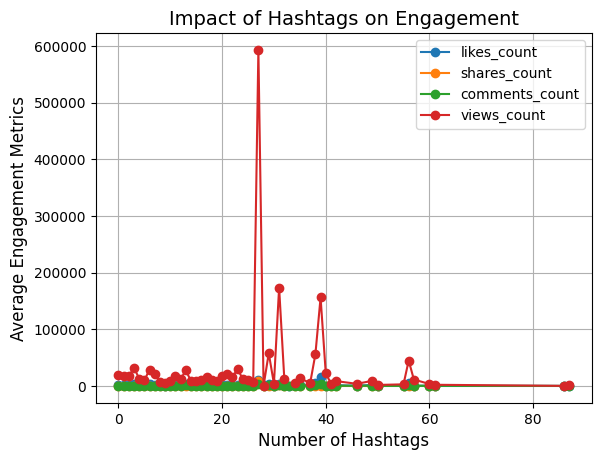

In [25]:
def count_hashtags(text):
    return text.count('#') if pd.notnull(text) else 0

data['hashtags_count'] = data['text_original'].fillna('').apply(count_hashtags)

hashtag_engagement = data.groupby('hashtags_count')[engagement_metrics].mean()

plt.figure(figsize=(10, 6))
hashtag_engagement.plot(kind='line', marker='o')
plt.title('Impact of Hashtags on Engagement', fontsize=14)
plt.xlabel('Number of Hashtags', fontsize=12)
plt.ylabel('Average Engagement Metrics', fontsize=12)
plt.grid()
plt.show()